<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210713%5D_CoolingTower_BoxPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
!git clone https://github.com/BingHungLee/Dataset.git

fatal: destination path 'Dataset' already exists and is not an empty directory.


In [4]:
cd /content/Dataset

/content/Dataset


In [7]:
df= pd.read_csv("CT_ABLOOP.csv")
df.head(10)

,ObsTime,WB,cold water temp-A,cold water temp-B,cold water avg.,hot water temp-A,hot water temp-B,total water flow -A,total water flow-B,hot water temp,TOTAL WATER FLOW,Quanity of Motor start,Motor current avg.,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,Label-T
0,2018/11/1 00:00,16.52,28.232,28.742,28.4870,35.906,38.429,35684.316,33428.384,37.126323,69112.700,17,41.961294,43.274,42.684,42.121,43.130,38.309,42.735,42.891,0.020,41.483,40.574,42.043,42.968,41.174,0.0,40.971,0.069,41.137,43.498,42.972,41.289,B
1,2018/11/1 00:30,17.71,28.280,28.830,28.5550,35.920,38.497,35843.522,33587.320,37.166629,69430.842,17,41.909118,43.283,42.656,41.898,42.963,38.237,42.797,42.847,0.021,41.325,40.580,42.064,42.970,41.105,0.0,40.893,0.069,41.088,43.473,42.941,41.245,B
2,2018/11/1 01:00,19.67,28.383,28.917,28.6500,36.008,38.612,35723.019,33745.743,37.272941,69468.762,17,41.887235,43.353,42.490,41.995,42.953,38.276,42.692,42.827,0.023,41.454,40.466,41.975,42.911,41.103,0.0,40.882,0.069,41.080,43.437,42.930,41.167,B
3,2018/11/1 01:30,20.14,28.385,28.885,28.6350,36.137,38.628,35854.726,33375.774,37.337902,69230.500,17,41.866353,43.288,42.469,41.962,42.892,38.280,42.675,42.863,0.021,41.342,40.471,41.934,42.902,41.104,0.0,40.828,0.069,41.051,43.485,42.931,41.161,B
4,2018/11/1 02:00,20.06,28.406,28.924,28.6650,35.972,38.592,35834.030,33647.508,37.240775,69481.538,17,41.879882,43.330,42.463,42.007,43.063,38.231,42.627,42.774,0.022,41.463,40.500,42.098,42.933,41.036,0.0,40.820,0.069,41.046,43.436,42.898,41.142,B
5,2018/11/1 02:30,19.83,28.343,28.900,28.6215,35.806,38.598,35750.810,33761.187,37.162043,69511.997,17,41.864294,43.298,42.539,41.992,42.894,38.191,42.677,42.769,0.022,41.444,40.507,41.958,42.939,41.071,0.0,40.792,0.069,41.041,43.428,42.930,41.132,B
6,2018/11/1 03:00,19.80,28.370,28.965,28.6675,35.808,38.635,35748.014,33684.779,37.179497,69432.793,17,41.823588,43.377,42.468,41.923,42.975,38.145,42.599,42.689,0.023,41.325,40.455,41.966,42.840,40.986,0.0,40.788,0.069,41.031,43.403,42.839,41.100,B
7,2018/11/1 03:30,20.08,28.544,29.138,28.8410,35.964,38.702,35606.292,33576.214,37.292828,69182.506,17,41.792882,43.263,42.443,41.962,42.890,38.101,42.581,42.720,0.025,41.067,40.332,41.926,42.918,41.040,0.0,40.729,0.069,41.041,43.402,42.862,41.108,B
8,2018/11/1 04:00,19.71,28.560,29.007,28.7835,36.063,38.733,35817.133,33575.814,37.354881,69392.947,17,41.795647,43.154,42.420,41.941,43.047,38.085,42.630,42.664,0.023,40.801,40.363,42.003,42.881,41.019,0.0,40.780,0.069,41.134,43.392,42.924,41.196,B
9,2018/11/1 04:30,18.30,28.354,28.725,28.5395,35.923,38.466,35817.258,33467.574,37.151379,69284.832,17,41.816294,43.178,42.373,41.921,43.060,38.085,42.596,42.693,0.021,41.015,40.439,42.050,42.961,41.083,0.0,40.793,0.069,41.091,43.400,42.901,41.148,B


In [8]:
df.count()

ObsTime                   10414
WB                        10414
cold water temp-A         10414
cold water temp-B         10414
cold water avg.           10414
hot water temp-A          10414
hot water temp-B          10414
total water flow -A       10414
total water flow-B        10414
hot water temp            10414
TOTAL WATER FLOW          10414
Quanity of Motor start    10414
Motor current avg.        10414
A1                        10414
A2                        10414
A3                        10414
A4                        10414
A5                        10414
A6                        10414
A7                        10414
A8                        10414
A9                        10414
A10                       10414
B1                        10414
B2                        10414
B3                        10414
B4                        10414
B5                        10414
B6                        10414
B7                        10414
B8                        10414
B9      

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


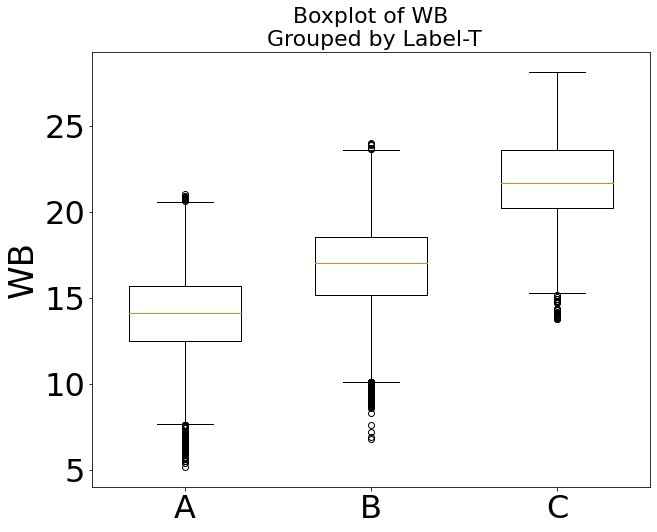

In [9]:
# 盒鬚圖 (Boxplot) "Label"對"XXX"作圖
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)
# 繪製多組數值，利用中括號 [] 整理
# positions: 盒鬚圖於 X 軸上的點位
# widths: 盒鬚圖寬度
ax.boxplot([df['WB'].loc[df['Label-T'] == 'A'].dropna(),
            df['WB'].loc[df['Label-T'] == 'B'].dropna(),
            df['WB'].loc[df['Label-T'] == 'C'].dropna()], 
            positions = [1, 2, 3], widths = 0.6)
ax.set_title('Boxplot of WB\n Grouped by Label-T', fontsize = 22)
ax.set_ylabel('WB', fontsize = 34)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(('A', 'B','C'))
ax.tick_params(labelsize = 32)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


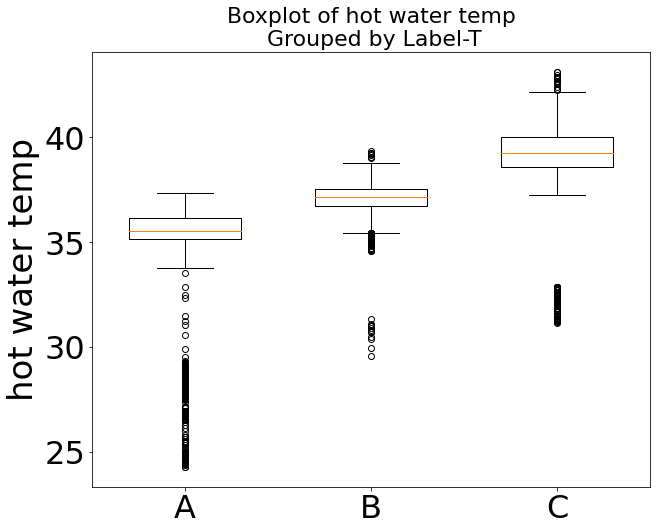

In [10]:
# 盒鬚圖 (Boxplot) "Label-T"對"XXX"作圖
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)
# 繪製多組數值，利用中括號 [] 整理
# positions: 盒鬚圖於 X 軸上的點位
# widths: 盒鬚圖寬度
ax.boxplot([df['hot water temp'].loc[df['Label-T'] == 'A'].dropna(),
            df['hot water temp'].loc[df['Label-T'] == 'B'].dropna(),
            df['hot water temp'].loc[df['Label-T'] == 'C'].dropna()], 
            positions = [1, 2, 3], widths = 0.6)
ax.set_title('Boxplot of hot water temp\n Grouped by Label-T', fontsize = 22)
ax.set_ylabel('hot water temp', fontsize = 34)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(('A', 'B', 'C'))
ax.tick_params(labelsize = 32)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


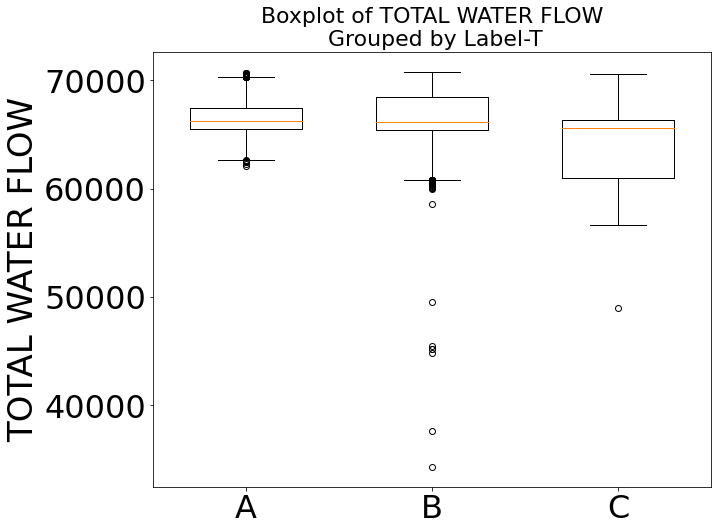

In [11]:
# 盒鬚圖 (Boxplot) "Label-T"對"XXX"作圖
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)
# 繪製多組數值，利用中括號 [] 整理
# positions: 盒鬚圖於 X 軸上的點位
# widths: 盒鬚圖寬度
ax.boxplot([df['TOTAL WATER FLOW'].loc[df['Label-T'] == 'A'].dropna(),
            df['TOTAL WATER FLOW'].loc[df['Label-T'] == 'B'].dropna(),
            df['TOTAL WATER FLOW'].loc[df['Label-T'] == 'C'].dropna()], 
            positions = [1, 2, 3], widths = 0.6)
ax.set_title('Boxplot of TOTAL WATER FLOW\n Grouped by Label-T', fontsize = 22)
ax.set_ylabel('TOTAL WATER FLOW', fontsize = 34)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(('A', 'B','C'))
ax.tick_params(labelsize = 32)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


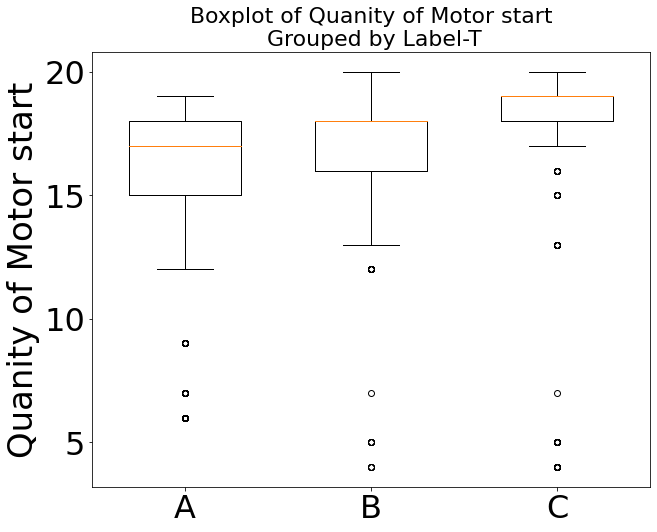

In [12]:
# 盒鬚圖 (Boxplot) "Label-T"對"XXX"作圖
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)
# 繪製多組數值，利用中括號 [] 整理
# positions: 盒鬚圖於 X 軸上的點位
# widths: 盒鬚圖寬度
ax.boxplot([df['Quanity of Motor start'].loc[df['Label-T'] == 'A'].dropna(),
            df['Quanity of Motor start'].loc[df['Label-T'] == 'B'].dropna(),
            df['Quanity of Motor start'].loc[df['Label-T'] == 'C'].dropna()], 
            positions = [1, 2, 3], widths = 0.6)
ax.set_title('Boxplot of Quanity of Motor start\n Grouped by Label-T', fontsize = 22)
ax.set_ylabel('Quanity of Motor start', fontsize = 34)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(('A', 'B','C'))
ax.tick_params(labelsize = 32)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


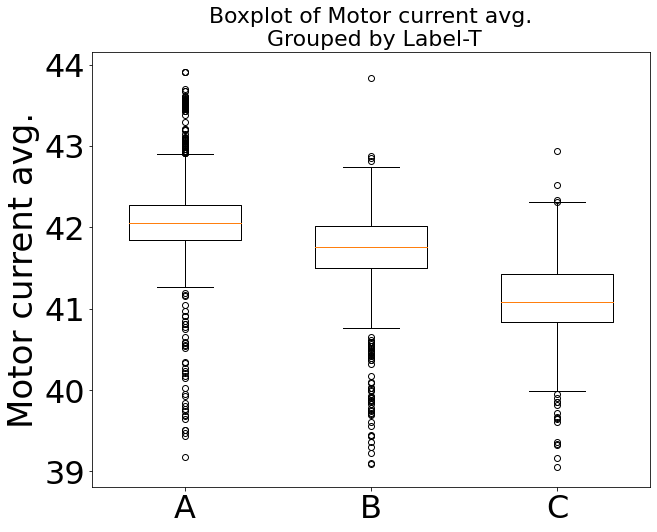

In [13]:
# 盒鬚圖 (Boxplot) "Label-T"對"XXX"作圖
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)
# 繪製多組數值，利用中括號 [] 整理
# positions: 盒鬚圖於 X 軸上的點位
# widths: 盒鬚圖寬度
ax.boxplot([df['Motor current avg.'].loc[df['Label-T'] == 'A'].dropna(),
            df['Motor current avg.'].loc[df['Label-T'] == 'B'].dropna(),
            df['Motor current avg.'].loc[df['Label-T'] == 'C'].dropna()], 
            positions = [1, 2, 3], widths = 0.6)
ax.set_title('Boxplot of Motor current avg.\n Grouped by Label-T', fontsize = 22)
ax.set_ylabel('Motor current avg.', fontsize = 34)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(('A', 'B','C'))
ax.tick_params(labelsize = 32)

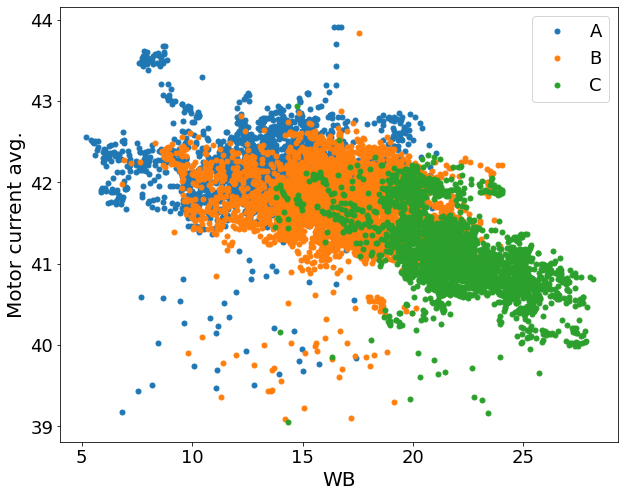

In [14]:
#=======================散佈圖===================================
# 依照反應變數分組繪製散佈圖 (Scatter Plot) 
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)
# 3組分開畫
# 組別: Label== A
ax.plot(df['WB'].loc[df['Label-T'] == 'A'], 
        df['Motor current avg.'].loc[df['Label-T'] == 'A'], 
        marker = '.', markersize = 10, linestyle = '')
# 組別: Label== B
ax.plot(df['WB'].loc[df['Label-T'] == 'B'], 
        df['Motor current avg.'].loc[df['Label-T'] == 'B'],
        marker = '.', markersize = 10, linestyle = '')
# 組別: Label== C
ax.plot(df['WB'].loc[df['Label-T'] == 'C'], 
        df['Motor current avg.'].loc[df['Label-T'] == 'C'],
        marker = '.', markersize = 10, linestyle = '')
ax.set_ylabel('Motor current avg.', fontsize = 20)
ax.set_xlabel('WB', fontsize = 20)
ax.tick_params(labelsize = 18)
# 標示組別辨識圖例
ax.legend(('A', 'B', 'C'), fontsize = 18)